# ML- PS2, Juan Arroyo Miranda

In [19]:
%matplotlib inline
%run process_data
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import os
import pandas as pd
import numpy as np

def read_data(raw_file):
    filename, file_extension = os.path.splitext(raw_file)
    if file_extension.endswith('.csv'):
        df =  pd.read_csv(raw_file, header=0)
        # Lower case names for columns
        df.columns = map(str.lower, df.columns)

    return df

In [2]:
df = read_data('credit-data.csv')

## Data summary

### No general function was created for the summary statistics because it would depend on the underlying data structure. In this case, a pandas dataframe. I decided to use pandas functions to present the information.

In [3]:
pd.set_option('display.float_format', lambda x: '%3f' % x)
df.mean()

personid                               75000.500000
seriousdlqin2yrs                           0.066840
revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
zipcode                                60648.810013
numberoftime30-59dayspastduenotworse       0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime60-89dayspastduenotworse       0.240387
numberofdependents                         0.757222
dtype: float64

In [4]:
df.mode().unstack()

personid                              0            nan
seriousdlqin2yrs                      0       0.000000
revolvingutilizationofunsecuredlines  0       0.000000
age                                   0      49.000000
zipcode                               0   60625.000000
numberoftime30-59dayspastduenotworse  0       0.000000
debtratio                             0       0.000000
monthlyincome                         0    5000.000000
numberofopencreditlinesandloans       0       6.000000
numberoftimes90dayslate               0       0.000000
numberrealestateloansorlines          0       0.000000
numberoftime60-89dayspastduenotworse  0       0.000000
numberofdependents                    0       0.000000
dtype: float64

In [5]:
df.isnull().sum()

personid                                    0
seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
zipcode                                     0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

Two variables have missing values that will be necessary to impute: monthly income and number of dependents.

### Number of Dependents

In [20]:
des_num_dep(df)

,numberofdependents,cumsum,percentage
0.000000,86902,86902,59.490950
1.000000,26316,113218,77.506230
2.000000,19522,132740,90.870506
3.000000,9483,142223,97.362332
4.000000,2862,145085,99.321586
5.000000,746,145831,99.832279
6.000000,158,145989,99.940442
7.000000,51,146040,99.975355
8.000000,24,146064,99.991785
9.000000,5,146069,99.995208


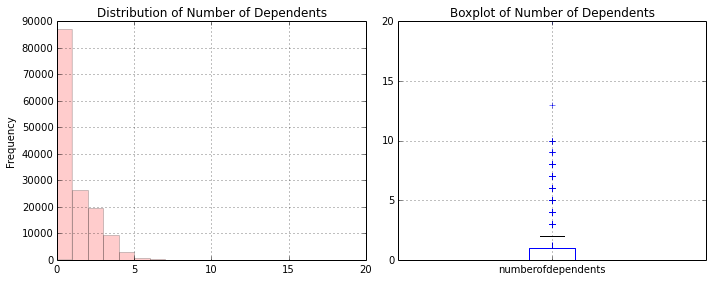

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

df['numberofdependents'].plot(kind = "hist", alpha = 0.2, bins = 20, color ='r', ax = ax1); 
ax1.set_title('Distribution of Number of Dependents');
ax1.grid()
df.boxplot(column='numberofdependents', ax = ax2); ax2.set_title('Boxplot of Number of Dependents')

plt.tight_layout()

The plots show that the distribution of the number of dependents is skewed to the right, with most people (86,902) having zero dependents. The boxplot shows the presence of some outliers, however, 90.87 % of the sample population concentrates between 0 and 2 dependents. Therefore, it would be reasonable to impute dependents drawn randomly between 0 and 2, taking  into account the frequencies observed in the data.

## Monthly Income

In [9]:
print(df['monthlyincome'].describe(include = 'all'))


count    120269.000000
mean       6670.221237
std       14384.674215
min           0.000000
25%        3400.000000
50%        5400.000000
75%        8249.000000
max     3008750.000000
Name: monthlyincome, dtype: float64


In [10]:
# Income deciles is a better description of the data (ignoring nan)
for i in range(10,101,5):
 print(i, 'Nan percentile', np.nanpercentile(df['monthlyincome'], i), "|", 'percentile', np.percentile(df['monthlyincome'], i) )


10 Nan percentile 2005.0 | percentile 2325.0
15 Nan percentile 2500.0 | percentile 2904.0
20 Nan percentile 3000.0 | percentile 3400.0
25 Nan percentile 3400.0 | percentile 3903.0
30 Nan percentile 3800.0 | percentile 4333.0
35 Nan percentile 4166.0 | percentile 4906.0
40 Nan percentile 4544.2 | percentile 5400.0
45 Nan percentile 5000.0 | percentile 6000.0
50 Nan percentile 5400.0 | percentile 6600.0
55 Nan percentile 5855.0 | percentile 7339.0
60 Nan percentile 6300.0 | percentile 8200.0
65 Nan percentile 6916.0 | percentile 9318.0
70 Nan percentile 7500.0 | percentile 10660.0
75 Nan percentile 8249.0 | percentile 13333.0
80 Nan percentile 9083.0 | percentile 54166.0
85 Nan percentile 10100.0 | percentile nan
90 Nan percentile 11666.0 | percentile nan
95 Nan percentile 14587.6 | percentile nan
100 Nan percentile 3008750.0 | percentile nan


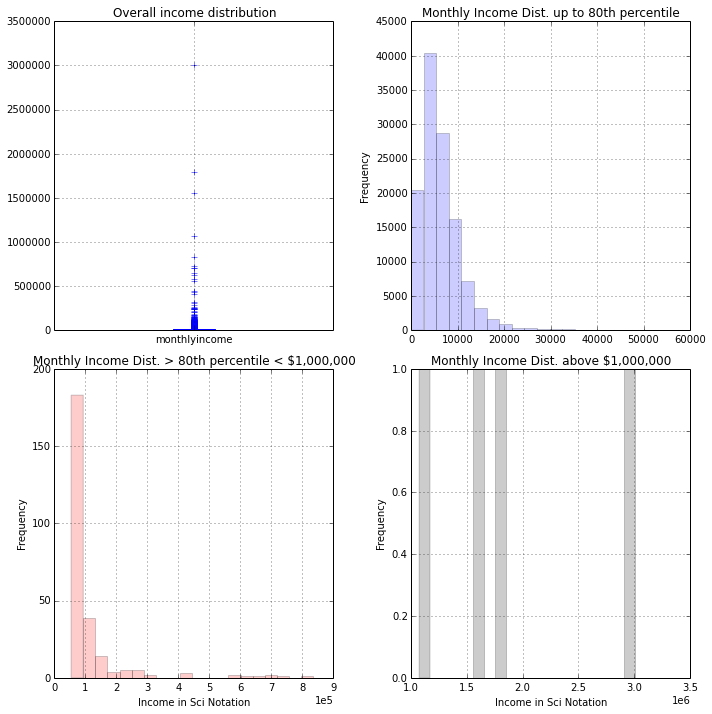

In [11]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize=(10,10))
# Overall Income Distribution
df.boxplot(column='monthlyincome', ax = ax1); ax1.set_title('Overall income distribution')
# Up to 80th percentile
df.monthlyincome[(df['monthlyincome']<=54166)].plot(kind = "hist", alpha = 0.2, color ='blue', bins= 20, ax = ax2); 
ax2.set_title('Monthly Income Dist. up to 80th percentile');
ax2.grid()

# Monthly income above $54,166 and below $1,000,000
df.monthlyincome[(df['monthlyincome']> 54166) & (df['monthlyincome']<=1000000)].plot(kind = "hist", alpha = 0.2, color ='r', bins= 20, ax = ax3); 
ax3.set_title('Monthly Income Dist. > 80th percentile < $1,000,000');
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
ax3.set_xlabel('Income in Sci Notation')
ax3.grid()
# Income distribution above $1,000,000
df.monthlyincome[(df['monthlyincome']>1000000)].plot(kind = "hist", alpha = 0.2, color ='black', bins= 20, ax = ax4); 
ax4.set_title('Monthly Income Dist. above $1,000,000');
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
ax4.set_xlabel('Income in Sci Notation')
ax4.grid()
plt.tight_layout()

As expected, the monthly income distribution is asymmetric. We can observe this, once we divide the distribution by deciles. The first plot (right top corner) shows the income distribution up to the 80th percentile, it is clear that most people earn less than \$10,000 per month.
Above the 80th percentile and below $1,000,000, we observe the same pattern with most people earning around \$100,000 per month.
It is intersting to note that the percentile function returns nan (versus nanpercentile function) for percentiles equal to and above the 85th percentile. This might suggest that the richest people in the sample tend not to report their monthly income.

Since we have 29,731 missing values, it might safe to assume that they come from the average population and not from the outliers. Therefore, I decided to impute the data with the mean value.

## Discretize and Visualize data

In [ ]:

income_bucket = discretize(df, 'monthlyincome', bins_income)

## Splitting Data and doing imputation

In [14]:
is_test = np.random.uniform(0, 1, len(df)) > 0.75
train = df[is_test==False]
test = df[is_test==True]

### What are the missing data patterns for the training and testing sets?

In [17]:
train.isnull().sum()

personid                                    0
seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
zipcode                                     0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           22248
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       2911
bins_monthlyincome                      23794
dtype: int64

In [39]:
test.isnull().sum()

personid                                   0
seriousdlqin2yrs                           0
revolvingutilizationofunsecuredlines       0
age                                        0
zipcode                                    0
numberoftime30-59dayspastduenotworse       0
debtratio                                  0
monthlyincome                           7483
numberofopencreditlinesandloans            0
numberoftimes90dayslate                    0
numberrealestateloansorlines               0
numberoftime60-89dayspastduenotworse       0
numberofdependents                         0
bins_monthlyincome                      7924
dtype: int64

In [34]:
des_num_dep(train[train.numberofdependents<3])

,numberofdependents,cumsum,percentage
0.000000,65174,65174,65.454801
1.000000,19751,84925,85.290898
2.000000,14646,99571,100.000000


In [35]:
des_num_dep(test[test.numberofdependents<3])

,numberofdependents,cumsum,percentage
0.000000,21728,21728,65.506949
1.000000,6565,28293,85.299527
2.000000,4876,33169,100.000000


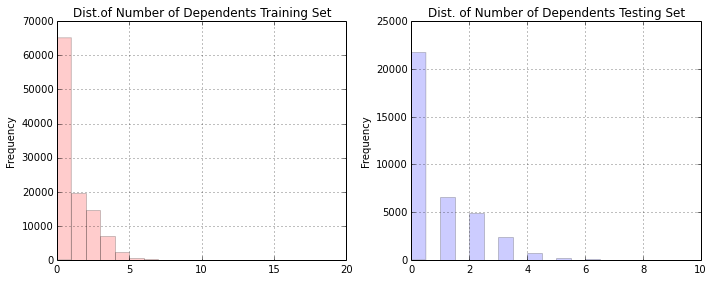

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

train['numberofdependents'].plot(kind = "hist", alpha = 0.2, bins = 20, color ='r', ax = ax1); 
ax1.set_title('Dist.of Number of Dependents Training Set');
ax1.grid()
test['numberofdependents'].plot(kind = "hist", alpha = 0.2, bins = 20, color ='b', ax = ax2); 
ax2.set_title('Dist. of Number of Dependents Testing Set')
ax2.grid()
plt.tight_layout()

Data imputation 

In [37]:
impute_val_to_column(train,'numberofdependents', 'random', 0, 3, [0.65,0.2,0.15])

In [38]:
train.corr()

personid                                    0
seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
zipcode                                     0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           22248
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                          0
bins_monthlyincome                      23794
dtype: int64

In [12]:
bins_income = range(0, 50000, 5000)

In [13]:
income_bucket = discretize(df, 'monthlyincome', bins_income)

In [251]:
df['bins_monthlyincome'].value_counts()

(0, 5000]         54225
(5000, 10000]     46091
(10000, 15000]    13035
(15000, 20000]     3181
(20000, 25000]      935
(25000, 30000]      376
(30000, 35000]      203
(35000, 40000]      140
(40000, 45000]       96
Name: bins_monthlyincome, dtype: int64

In [278]:
impute_val_to_column(df,'numberofdependents', 'random', 0, 3, [0.65,0.2,0.15] )

In [279]:
df['numberofdependents'].value_counts().to_frame()

,numberofdependents
0.000000,90826
1.000000,26316
2.000000,19522
3.000000,9483
4.000000,2862
5.000000,746
6.000000,158
7.000000,51
8.000000,24
9.000000,5


In [51]:
print_statistics(df)

**** column names:   
 ['personid' 'seriousdlqin2yrs' 'revolvingutilizationofunsecuredlines' 'age'
 'zipcode' 'numberoftime30-59dayspastduenotworse' 'debtratio'
 'monthlyincome' 'numberofopencreditlinesandloans'
 'numberoftimes90dayslate' 'numberrealestateloansorlines'
 'numberoftime60-89dayspastduenotworse' 'numberofdependents']
**** top of the data:  
    personid  \
0         1   
1         2   
2         3   
3         4   
4         5   

   seriousdlqin2yrs  \
0                 1   
1                 0   
2                 0   
3                 0   
4                 0   

   revolvingutilizationofunsecuredlines  \
0                                 0.766   
1                                 0.957   
2                                 0.658   
3                                 0.234   
4                                 0.907   

   age  zipcode  \
0   45    60644   
1   40    60637   
2   38    60601   
3   30    60601   
4   49    60625   

   numberoftime30-59dayspastduenotworse

'PersonID, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, zipcode, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents'